In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_ABS.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.042424,#VALUE!,#VALUE!,0.492825,0.592149,0.576450,0.738316,0.411216,0.554485,0.367785,0.483998,0.296604,0.406063,0.181587,0.370326,0.323947,0.773659,4
1,1997-02-28 00:00:00,0.030303,#VALUE!,#VALUE!,0.578927,0.558017,0.514660,0.624385,0.395695,0.415181,0.289185,0.404881,0.278218,0.374875,0.161709,0.338374,0.319785,0.783264,4
2,1997-03-31 00:00:00,0.000000,#VALUE!,#VALUE!,0.580438,0.872439,0.375946,0.569335,0.390152,0.488696,0.212427,0.369817,0.252937,0.376553,0.251378,0.443947,0.315132,0.745390,4
3,1997-04-30 00:00:00,0.024242,#VALUE!,#VALUE!,0.344789,0.347304,0.305958,0.347329,0.290743,0.310726,0.209971,0.260192,0.252681,0.305611,0.243253,0.382426,0.277057,0.639667,4
4,1997-05-31 00:00:00,0.042424,#VALUE!,#VALUE!,0.246601,0.439709,0.341267,0.257878,0.232354,0.301562,0.217954,0.296403,0.299157,0.361117,0.265888,0.431798,0.222821,0.677654,4


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,277.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.384531,0.496887,0.499424,0.470617,0.492462,0.480718,0.500017,0.489680,0.492247,0.481544,0.484984,0.495937,0.532766,2.55914
std,0.255453,0.250317,0.183671,0.252012,0.194628,0.242491,0.212772,0.246996,0.213931,0.244801,0.213747,0.269899,0.216243,1.08418
min,0.000000,0.000000,0.000000,-0.581118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.181818,0.375000,0.375000,0.377956,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.424237,2.00000
50%,0.327273,0.502995,0.487146,0.472931,0.492441,0.471254,0.507368,0.490169,0.499027,0.496155,0.491617,0.549094,0.549190,3.00000
75%,0.509091,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.707061,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               221 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 85th percentile (top 15%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 85th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.85) # every data point over the 85th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.539393939


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.649403,0.622263,0.500192,0.632122,0.488860,0.641423,0.491796,0.638979,0.483244,0.563737,0.389147,0.640782,0.460575,1.939394
std,0.119746,0.298393,0.164060,0.259504,0.177756,0.262410,0.193767,0.267871,0.200641,0.219174,0.200452,0.218272,0.203047,1.087985
min,0.545455,0.000000,0.203199,0.000000,0.047883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003673,0.030134,1.000000
25%,0.557576,0.437106,0.384710,0.514320,0.382434,0.540643,0.387937,0.521578,0.423611,0.497896,0.248964,0.550563,0.340593,1.000000
50%,0.593939,0.625000,0.508891,0.680248,0.544413,0.640735,0.520117,0.644918,0.497199,0.625000,0.388760,0.656097,0.464136,2.000000
75%,0.709091,0.848834,0.636498,0.785200,0.614203,0.801620,0.589541,0.823672,0.529673,0.682603,0.491148,0.741185,0.535055,2.000000
max,0.987879,1.000000,0.844141,1.000000,0.772805,1.000000,0.850337,1.000000,0.911122,0.979469,0.804748,1.000000,0.879829,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 3-mo (Treasury)  33.0  0.622263  0.298393  0.051943   
 2                         combined  66.0  0.635833  0.226010  0.027820   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.516458  0.728068  
 2   0.580273  0.691393  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.0271
 1                              Degrees of freedom =   64.0000
 2                                               t =    0.4849
 3                           Two side test p value =    0.6294
 4                          Difference < 0 p value =    0.6853
 5                          Difference > 0 p value =    0.3147
 6                                       Cohen's d =    0.1194
 7                                       Hedge's g =    0.1180
 8                        

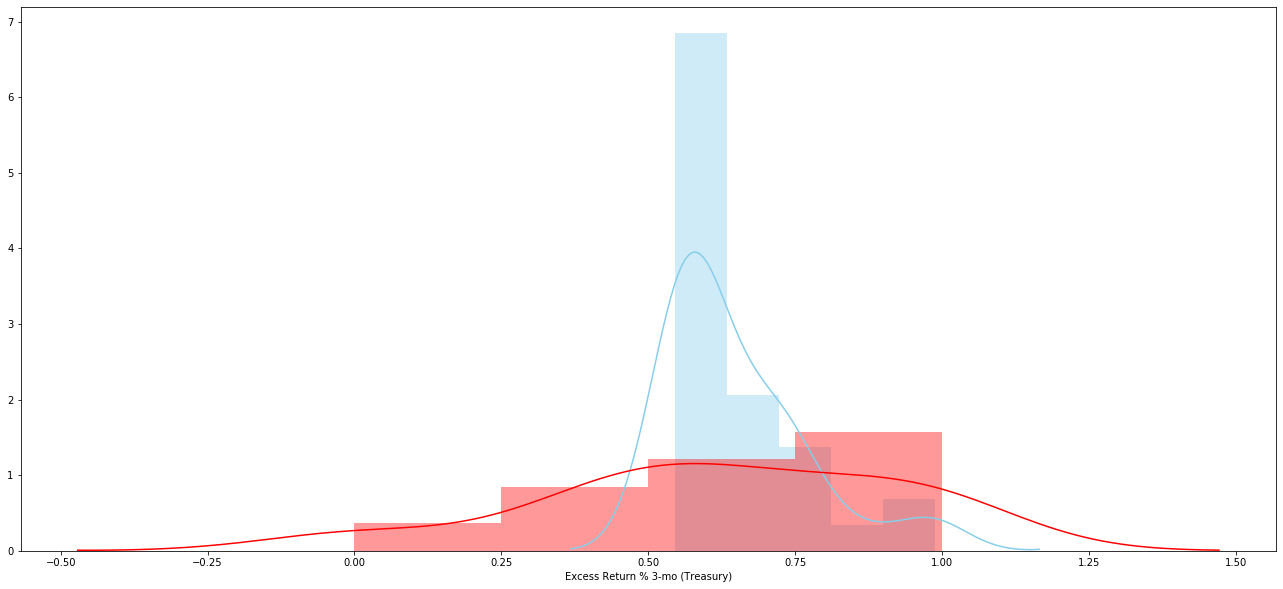

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 3-mo (Agg)  33.0  0.500192  0.164060  0.028559   0.442019   
 2                    combined  66.0  0.574797  0.161126  0.019833   0.535188   
 
    Interval  
 0  0.691863  
 1  0.558365  
 2  0.614407  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.1492
 1                             Degrees of freedom =   64.0000
 2                                              t =    4.2201
 3                          Two side test p value =    0.0001
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.0389
 7                                      Hedge's g =    1.0267
 8                                  Glass's delta =    

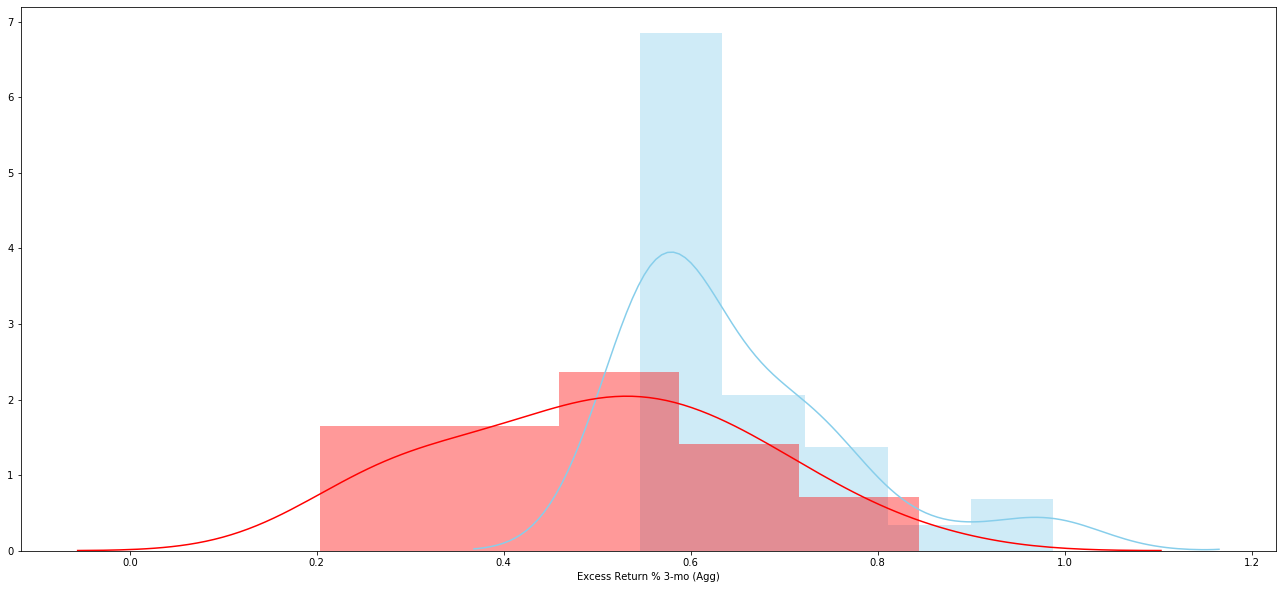

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 6-mo (Treasury)  33.0  0.632122  0.259504  0.045174   
 2                         combined  66.0  0.640763  0.200719  0.024707   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.540106  0.724138  
 2   0.591420  0.690106  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.0173
 1                              Degrees of freedom =   64.0000
 2                                               t =    0.3473
 3                           Two side test p value =    0.7295
 4                          Difference < 0 p value =    0.6353
 5                          Difference > 0 p value =    0.3647
 6                                       Cohen's d =    0.0855
 7                                       Hedge's g =    0.0845
 8                        

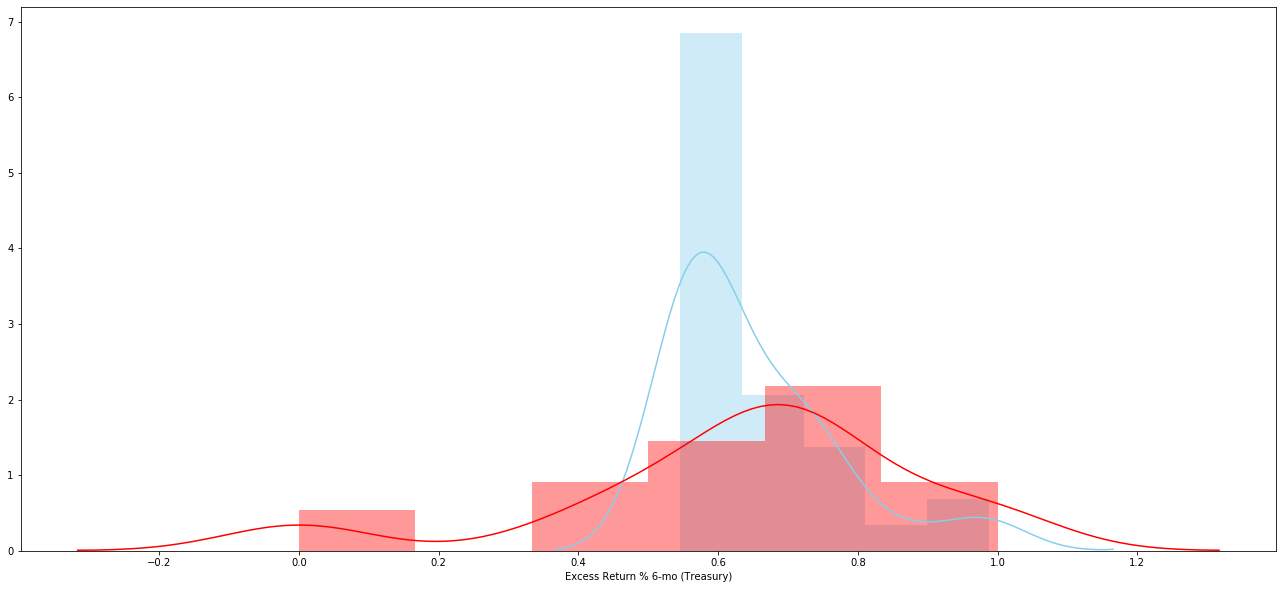

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 6-mo (Agg)  33.0  0.488860  0.177756  0.030943   0.425830   
 2                    combined  66.0  0.569132  0.170756  0.021019   0.527155   
 
    Interval  
 0  0.691863  
 1  0.551890  
 2  0.611109  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.1605
 1                             Degrees of freedom =   64.0000
 2                                              t =    4.3030
 3                          Two side test p value =    0.0001
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.0593
 7                                      Hedge's g =    1.0469
 8                                  Glass's delta =    

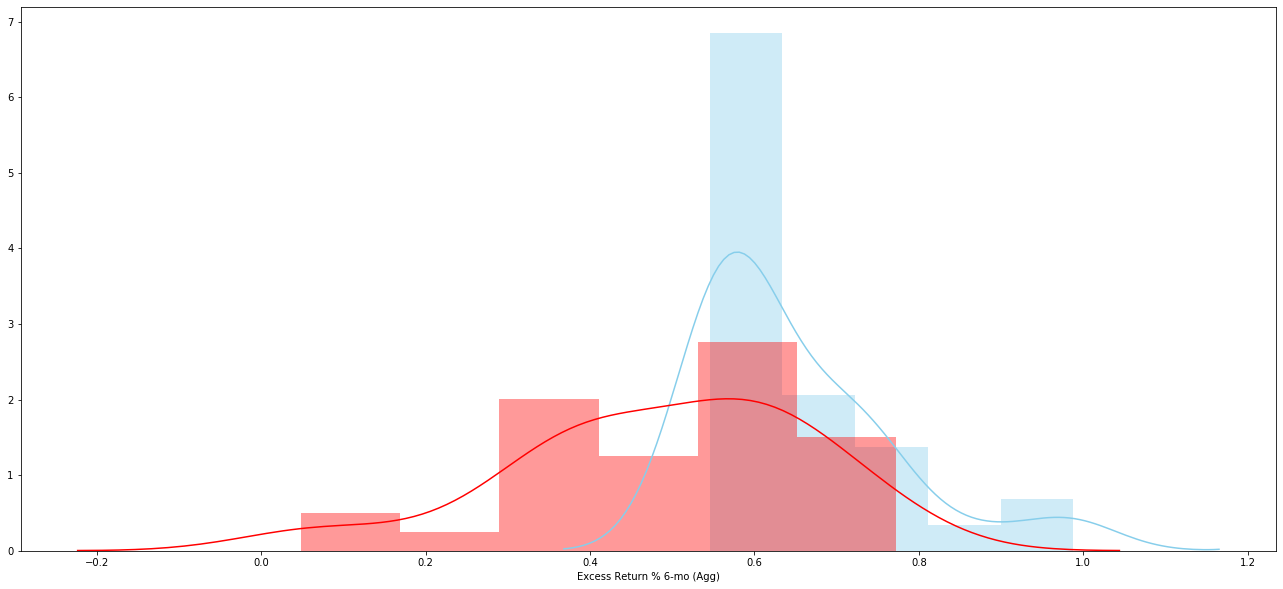

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 9-mo (Treasury)  33.0  0.641423  0.262410  0.045680   
 2                         combined  66.0  0.645413  0.202423  0.024917   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.548376  0.734469  
 2   0.595651  0.695175  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.0080
 1                              Degrees of freedom =   64.0000
 2                                               t =    0.1589
 3                           Two side test p value =    0.8742
 4                          Difference < 0 p value =    0.5629
 5                          Difference > 0 p value =    0.4371
 6                                       Cohen's d =    0.0391
 7                                       Hedge's g =    0.0387
 8                        

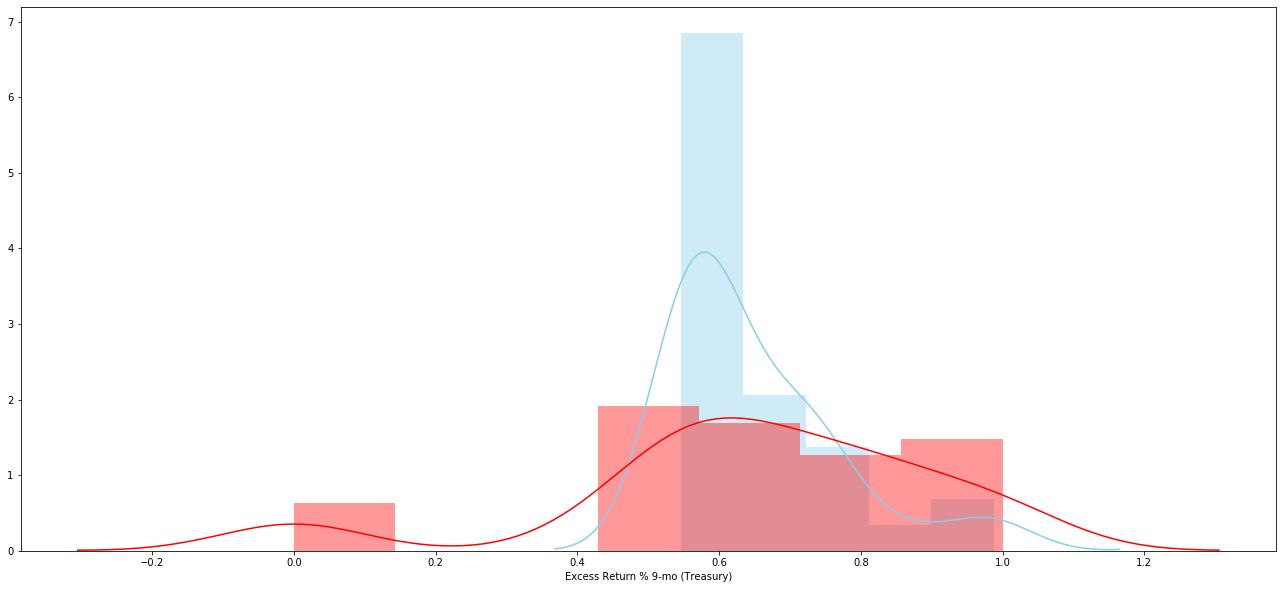

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 9-mo (Agg)  33.0  0.491796  0.193767  0.033730   0.423090   
 2                    combined  66.0  0.570600  0.178462  0.021967   0.526728   
 
    Interval  
 0  0.691863  
 1  0.560503  
 2  0.614471  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.1576
 1                             Degrees of freedom =   64.0000
 2                                              t =    3.9748
 3                          Two side test p value =    0.0002
 4                         Difference < 0 p value =    0.9999
 5                         Difference > 0 p value =    0.0001
 6                                      Cohen's d =    0.9785
 7                                      Hedge's g =    0.9670
 8                                  Glass's delta =    

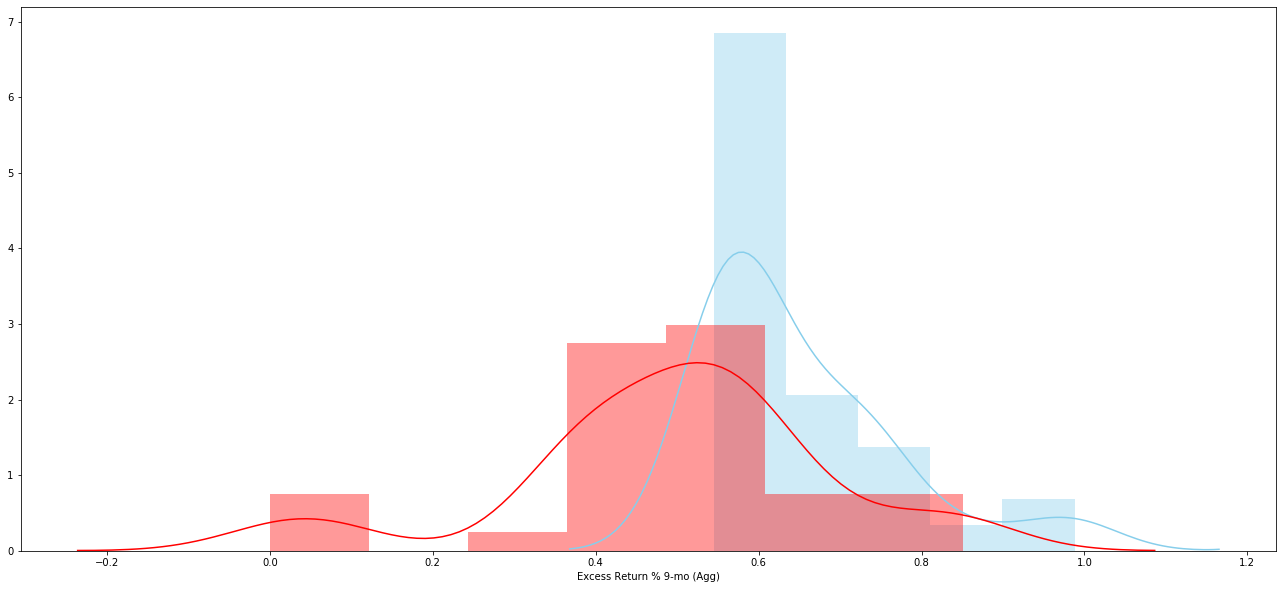

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 12-mo (Treasury)  33.0  0.638979  0.267871  0.046630   
 2                          combined  66.0  0.644191  0.205943  0.025350   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.543996  0.733962  
 2   0.593564  0.694818  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.0104
 1                              Degrees of freedom =   64.0000
 2                                               t =    0.2041
 3                           Two side test p value =    0.8389
 4                          Difference < 0 p value =    0.5805
 5                          Difference > 0 p value =    0.4195
 6                                       Cohen's d =    0.0502
 7                                       Hedge's g =    0.0497
 8                    

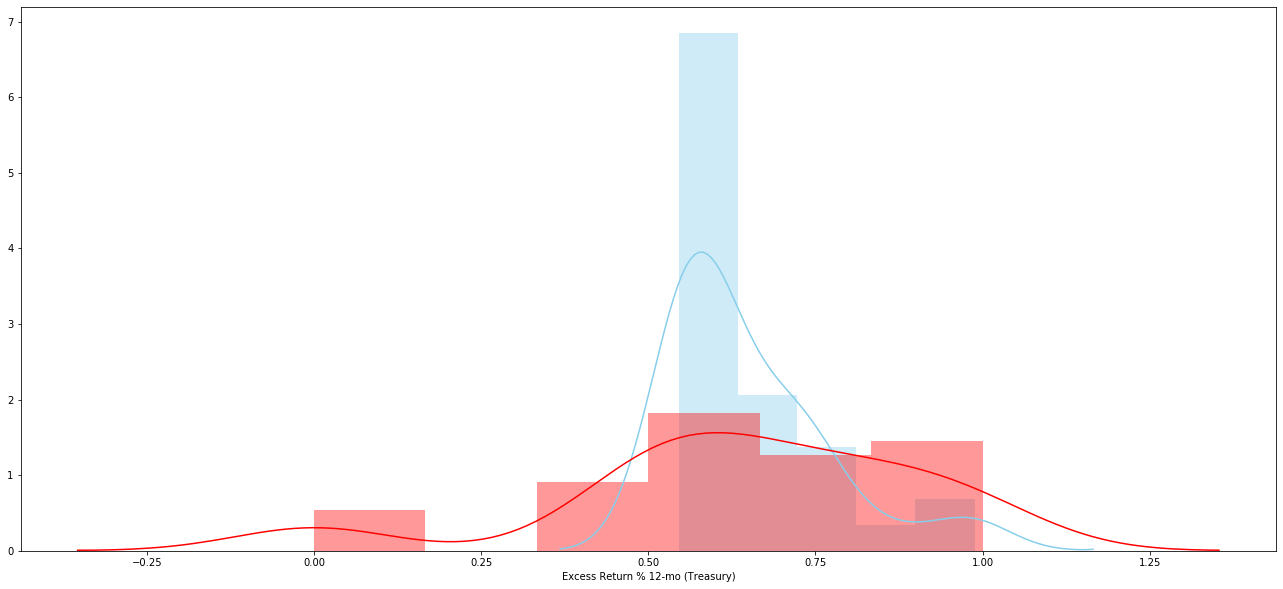

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 12-mo (Agg)  33.0  0.483244  0.200641  0.034927   0.412100   
 2                     combined  66.0  0.566323  0.184082  0.022659   0.521070   
 
    Interval  
 0  0.691863  
 1  0.554388  
 2  0.611577  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.1662
 1                              Degrees of freedom =   64.0000
 2                                               t =    4.0851
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    0.9999
 5                          Difference > 0 p value =    0.0001
 6                                       Cohen's d =    1.0057
 7                                       Hedge's g =    0.9938
 8                                   Glass

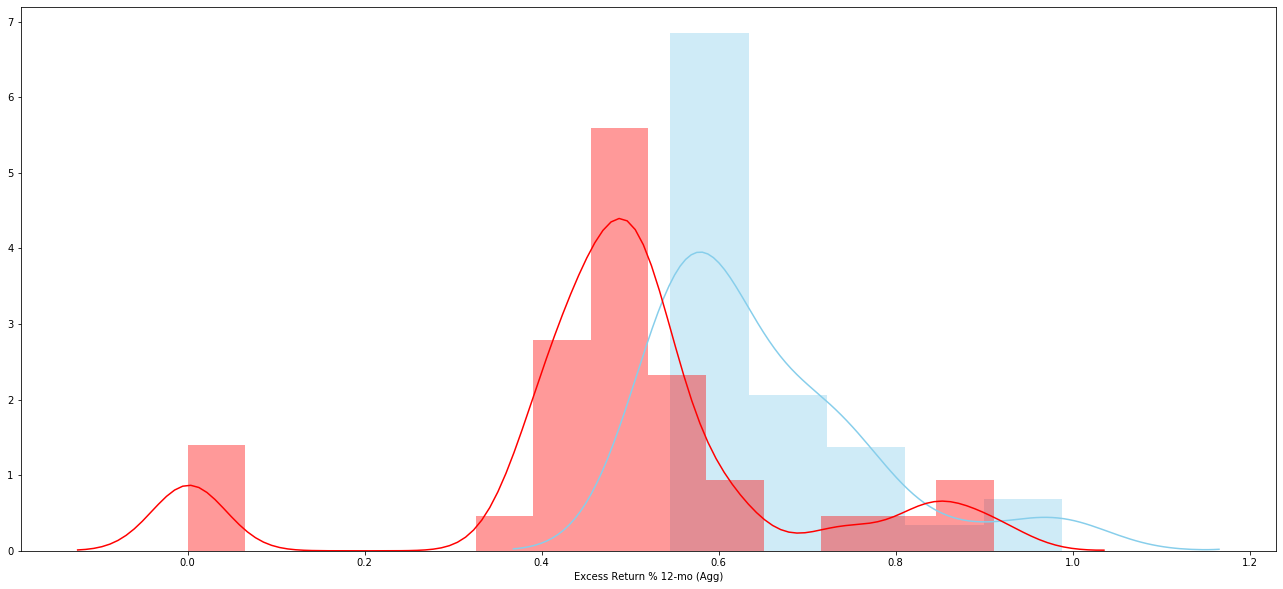

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 24-mo (Treasury)  33.0  0.563737  0.219174  0.038153   
 2                          combined  66.0  0.606570  0.180475  0.022215   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.486021  0.641452  
 2   0.562204  0.650936  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.0857
 1                              Degrees of freedom =   64.0000
 2                                               t =    1.9704
 3                           Two side test p value =    0.0531
 4                          Difference < 0 p value =    0.9734
 5                          Difference > 0 p value =    0.0266
 6                                       Cohen's d =    0.4851
 7                                       Hedge's g =    0.4794
 8                    

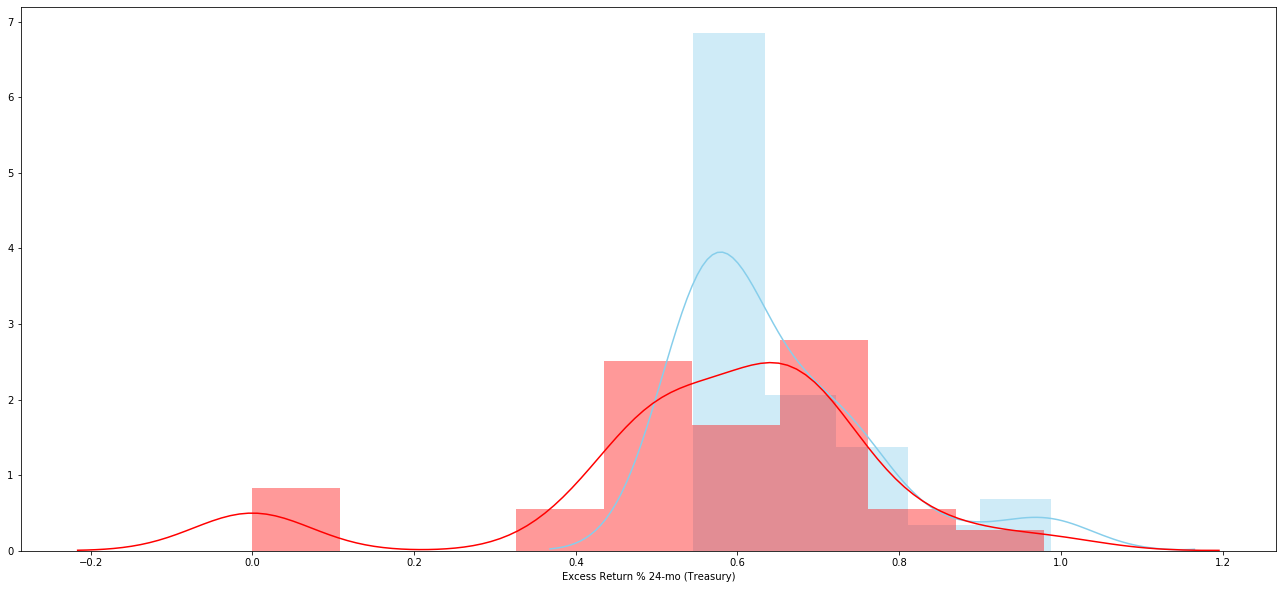

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 24-mo (Agg)  33.0  0.389147  0.200452  0.034894   0.318070   
 2                     combined  66.0  0.519275  0.209844  0.025830   0.467689   
 
    Interval  
 0  0.691863  
 1  0.460224  
 2  0.570861  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.2603
 1                              Degrees of freedom =   64.0000
 2                                               t =    6.4029
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.5763
 7                                       Hedge's g =    1.5578
 8                                   Glass

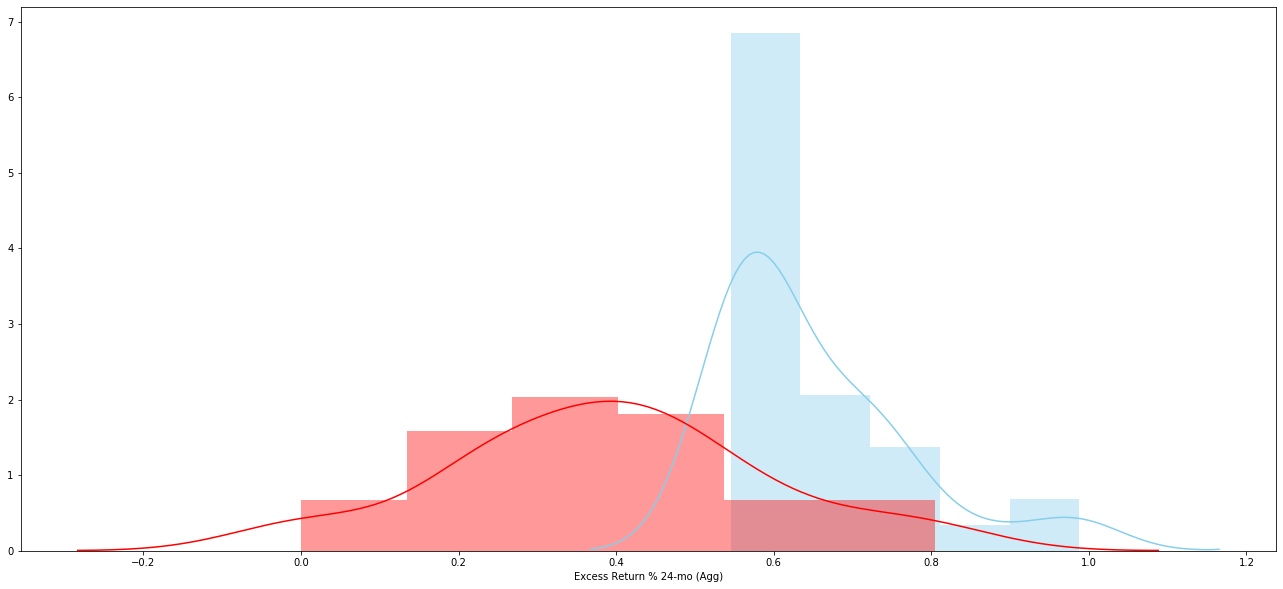

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 36-mo (Treasury)  33.0  0.640782  0.218272  0.037996   
 2                          combined  66.0  0.645093  0.174737  0.021509   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.563386  0.718178  
 2   0.602137  0.688048  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.0086
 1                              Degrees of freedom =   64.0000
 2                                               t =    0.1989
 3                           Two side test p value =    0.8430
 4                          Difference < 0 p value =    0.5785
 5                          Difference > 0 p value =    0.4215
 6                                       Cohen's d =    0.0490
 7                                       Hedge's g =    0.0484
 8                    

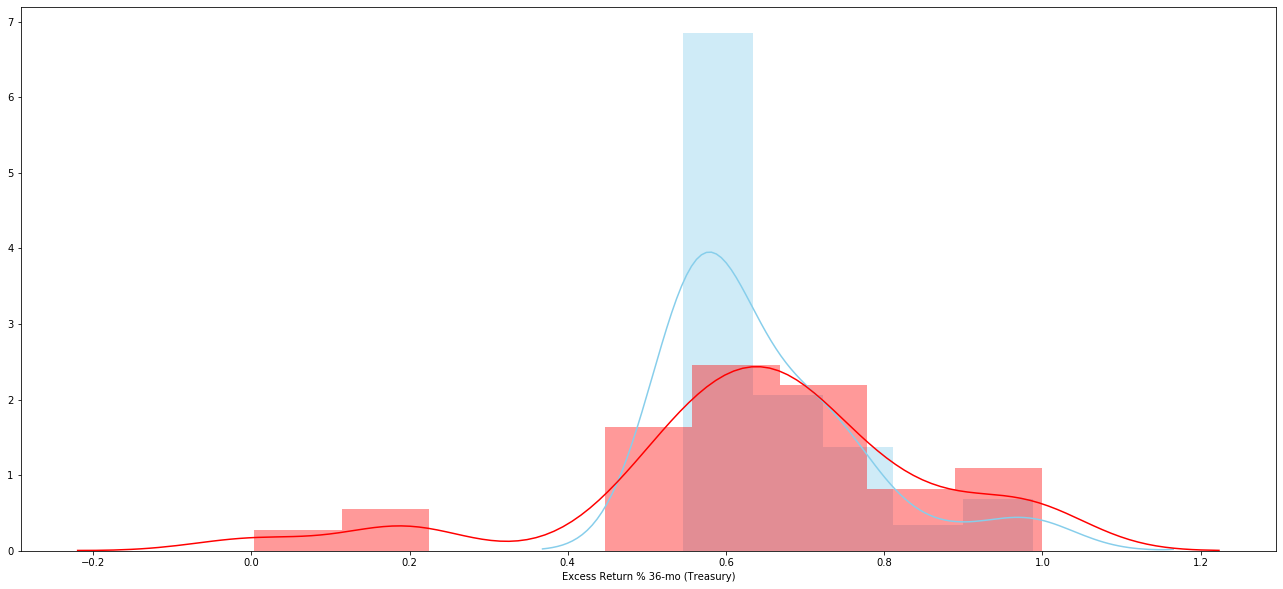

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 36-mo (Agg)  33.0  0.460575  0.203047  0.035346   0.388577   
 2                     combined  66.0  0.554989  0.190807  0.023487   0.508083   
 
    Interval  
 0  0.691863  
 1  0.532572  
 2  0.601895  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.1888
 1                              Degrees of freedom =   64.0000
 2                                               t =    4.6017
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.1328
 7                                       Hedge's g =    1.1195
 8                                   Glass

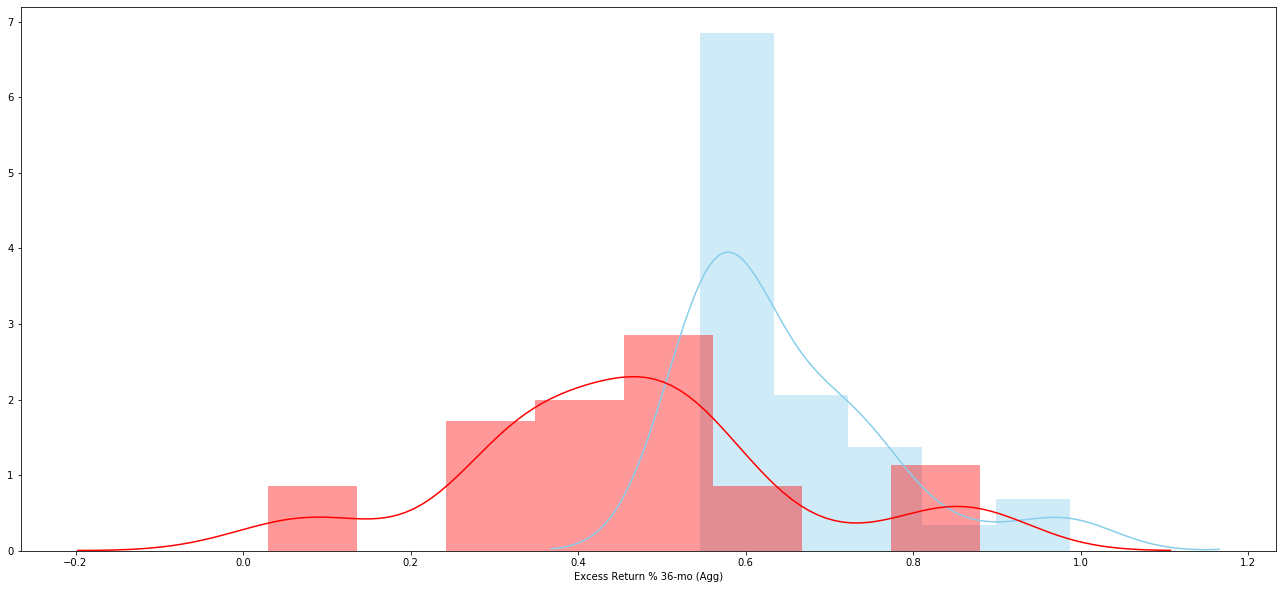

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_ABS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,277.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.384531,0.492726,0.501825,0.496887,0.499424,0.470617,0.492462,0.480718,0.500017,0.489680,0.492247,0.481544,0.484984,0.495937,0.532766,2.55914
std,0.255453,0.250628,0.200742,0.250317,0.183671,0.252012,0.194628,0.242491,0.212772,0.246996,0.213931,0.244801,0.213747,0.269899,0.216243,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.581118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.181818,0.375000,0.375000,0.375000,0.375000,0.377956,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.424237,2.00000
50%,0.327273,0.495846,0.503522,0.502995,0.487146,0.472931,0.492441,0.471254,0.507368,0.490169,0.499027,0.496155,0.491617,0.549094,0.549190,3.00000
75%,0.509091,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.707061,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 3-mo (Treasury)  278.0  0.496887  0.250317  0.015013   
 2                         combined  311.0  0.513070  0.244300  0.013853   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.467333  0.526441  
 2   0.485813  0.540328  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.1525
 1                              Degrees of freedom =   309.0000
 2                                               t =     3.4498
 3                           Two side test p value =     0.0006
 4                          Difference < 0 p value =     0.9997
 5                          Difference > 0 p value =     0.0003
 6                                       Cohen's d =     0.6352
 7                                       Hedge's g =     0.6336
 8           

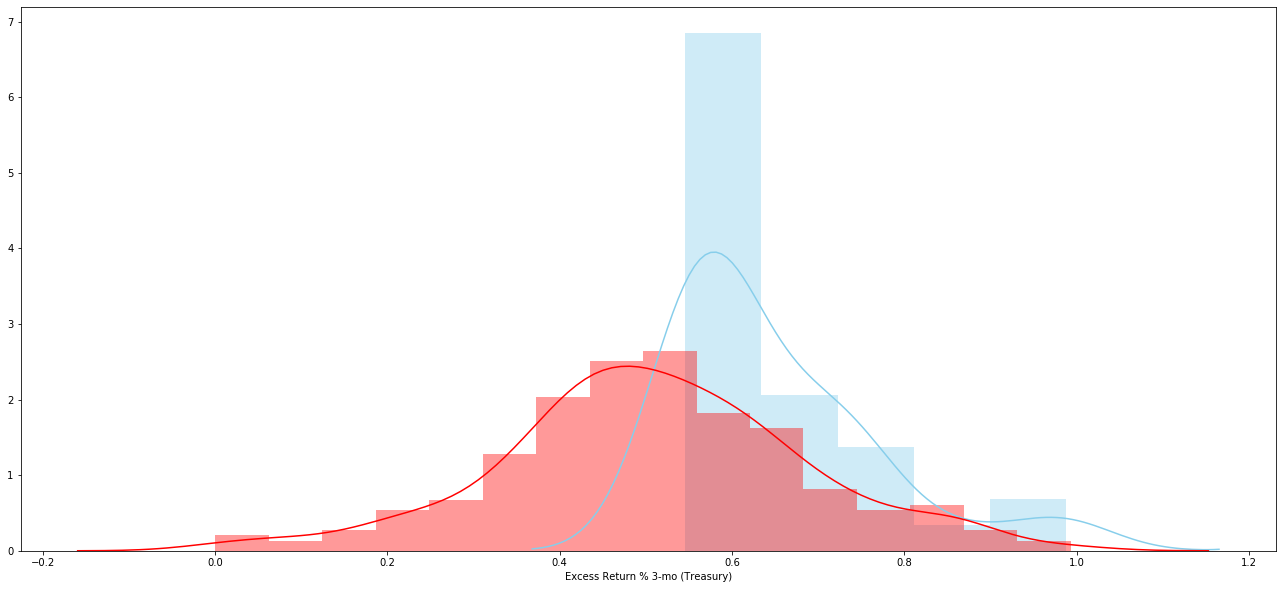

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 3-mo (Agg)  278.0  0.499424  0.183671  0.011016   0.477739   
 2                    combined  311.0  0.515339  0.183751  0.010420   0.494837   
 
    Interval  
 0  0.691863  
 1  0.521110  
 2  0.535841  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.1500
 1                             Degrees of freedom =   309.0000
 2                                              t =     4.5732
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.8420
 7                                      Hedge's g =     0.8400
 8                                  Glass'

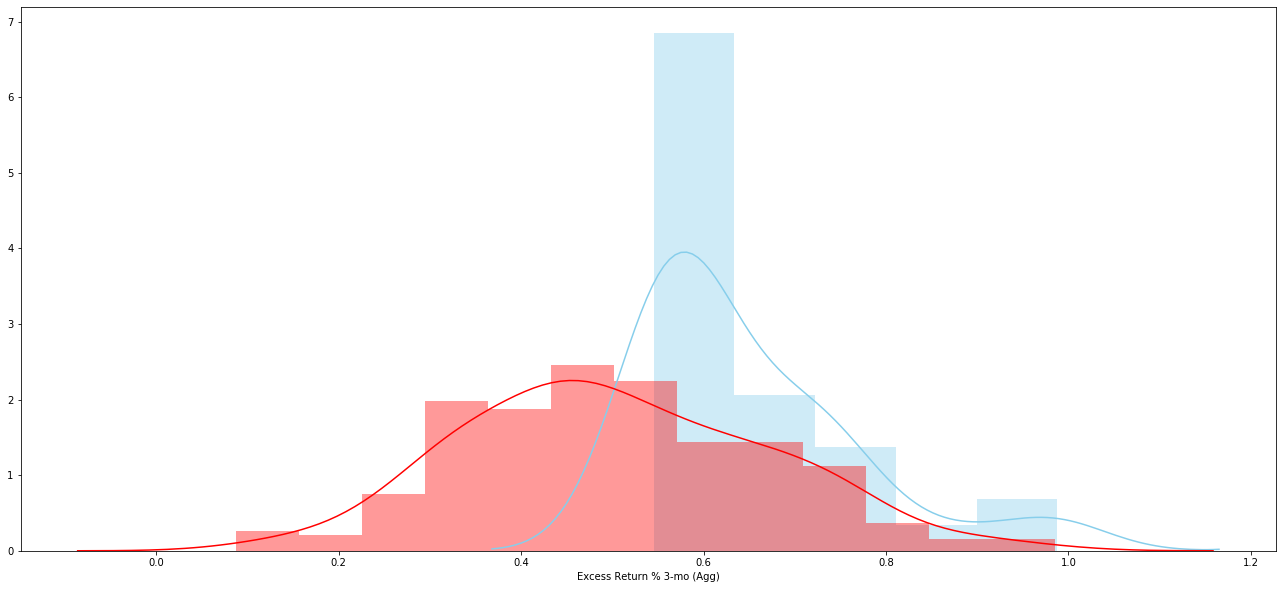

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 6-mo (Treasury)  275.0  0.470617  0.252012  0.015197   
 2                         combined  308.0  0.489773  0.247479  0.014101   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.440700  0.500535  
 2   0.462025  0.517521  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.1788
 1                              Degrees of freedom =   306.0000
 2                                               t =     4.0169
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.7400
 7                                       Hedge's g =     0.7382
 8           

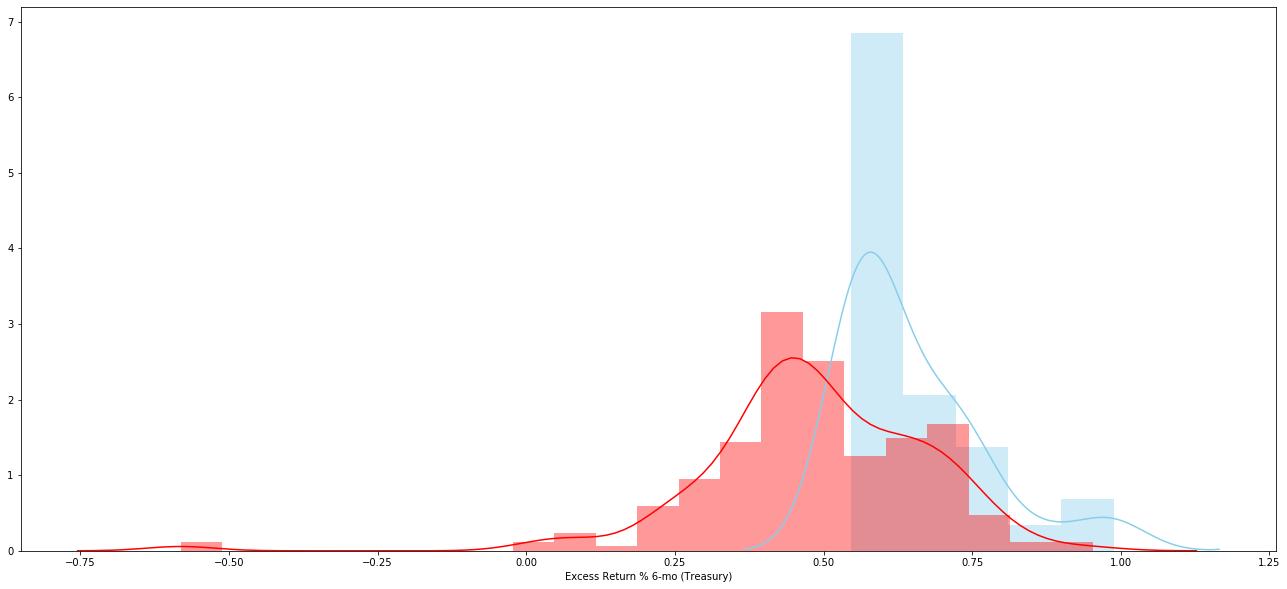

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 6-mo (Agg)  275.0  0.492462  0.194628  0.011736   0.469357   
 2                    combined  308.0  0.509277  0.194079  0.011059   0.487517   
 
    Interval  
 0  0.691863  
 1  0.515567  
 2  0.531037  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.1569
 1                             Degrees of freedom =   306.0000
 2                                              t =     4.5266
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.8339
 7                                      Hedge's g =     0.8319
 8                                  Glass'

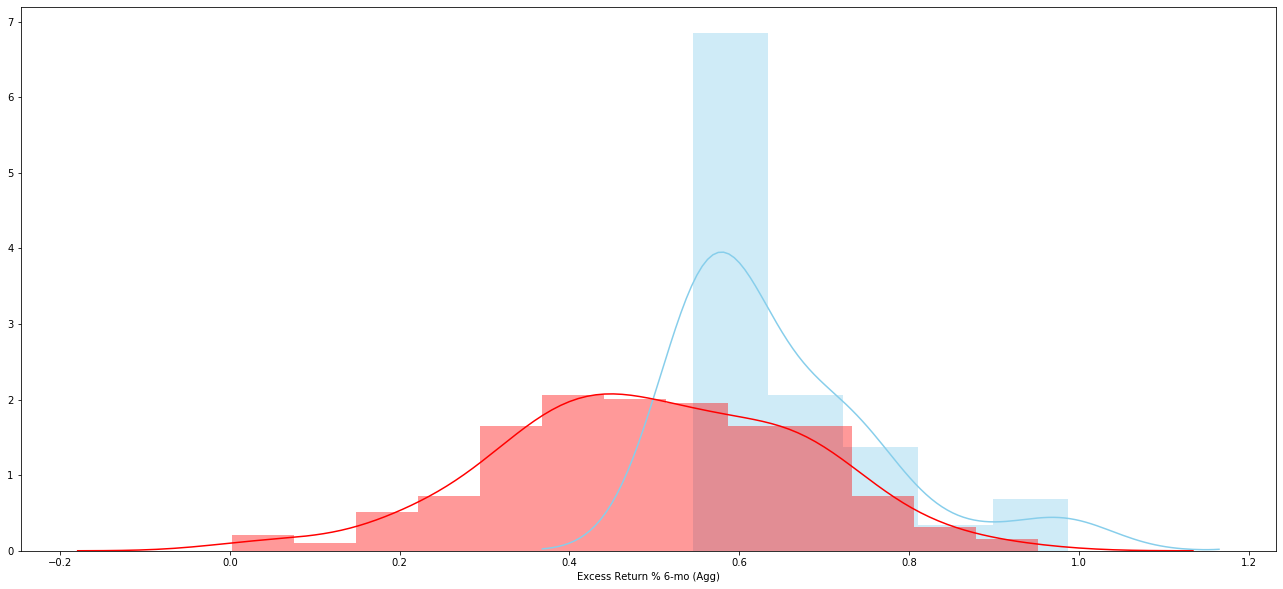

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 9-mo (Treasury)  272.0  0.480718  0.242491  0.014703   
 2                         combined  305.0  0.498969  0.238081  0.013633   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.451771  0.509665  
 2   0.472143  0.525795  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.1687
 1                              Degrees of freedom =   303.0000
 2                                               t =     3.9341
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.7252
 7                                       Hedge's g =     0.7234
 8           

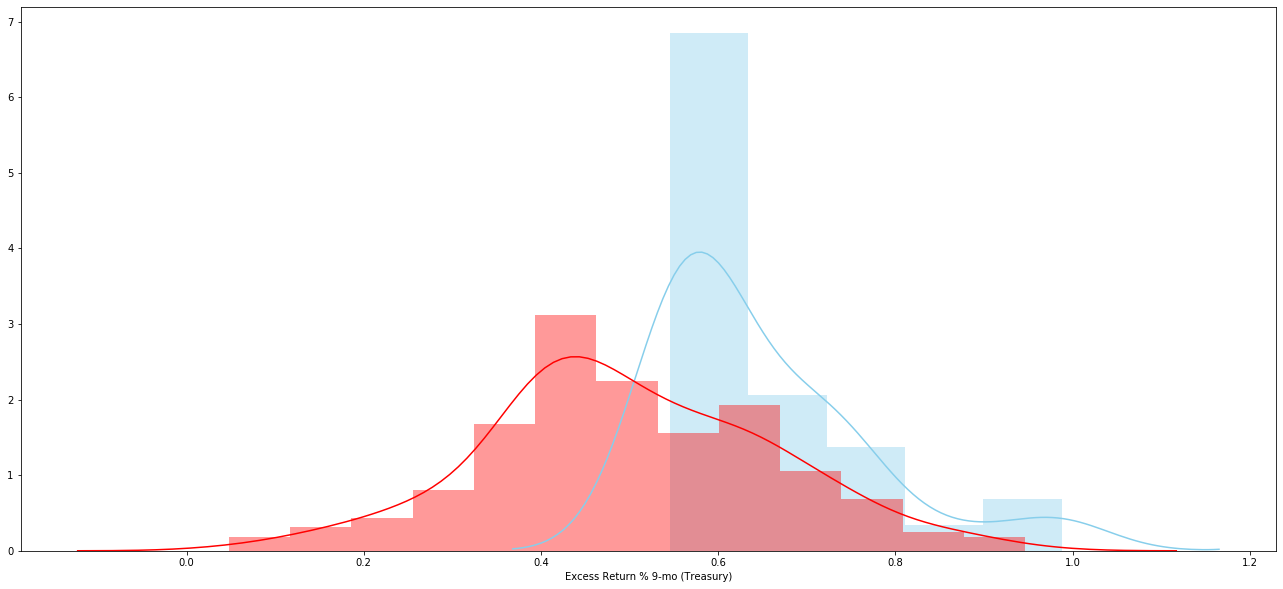

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 9-mo (Agg)  272.0  0.500017  0.212772  0.012901   0.474618   
 2                    combined  305.0  0.516180  0.209827  0.012015   0.492538   
 
    Interval  
 0  0.691863  
 1  0.525416  
 2  0.539823  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.1494
 1                             Degrees of freedom =   303.0000
 2                                              t =     3.9541
 3                          Two side test p value =     0.0001
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.7289
 7                                      Hedge's g =     0.7271
 8                                  Glass'

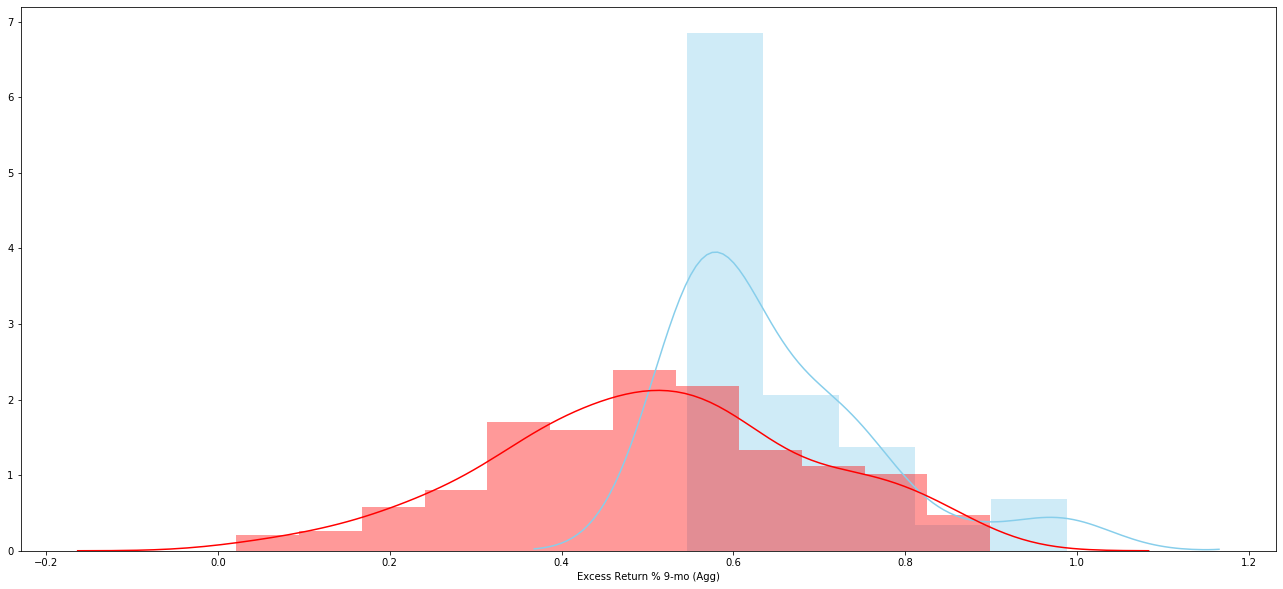

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 12-mo (Treasury)  269.0  0.489680  0.246996  0.015060   
 2                          combined  302.0  0.507133  0.241525  0.013898   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.460029  0.519330  
 2   0.479783  0.534483  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.1597
 1                              Degrees of freedom =   300.0000
 2                                               t =     3.6584
 3                           Two side test p value =     0.0003
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.6748
 7                                       Hedge's g =     0.6731
 8       

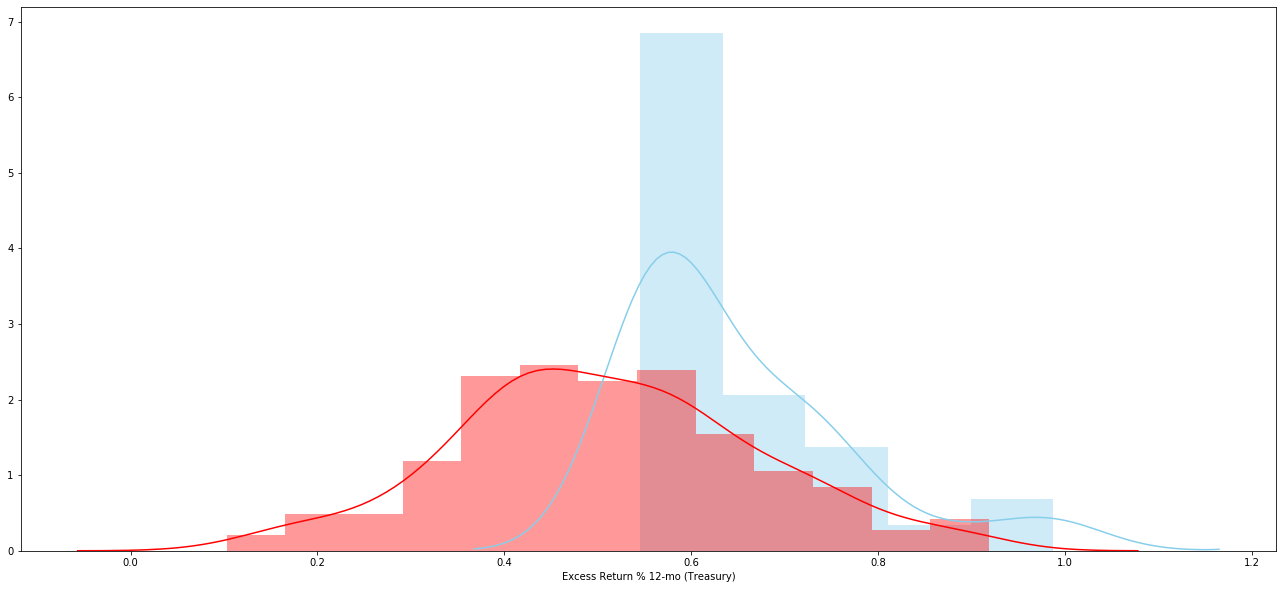

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 12-mo (Agg)  269.0  0.492247  0.213931  0.013044   
 2                     combined  302.0  0.509420  0.211389  0.012164   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.466566  0.517928  
 2   0.485482  0.533357  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.1572
 1                              Degrees of freedom =   300.0000
 2                                               t =     4.1372
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.7631
 7                                       Hedge's g =     0.7612
 8                           

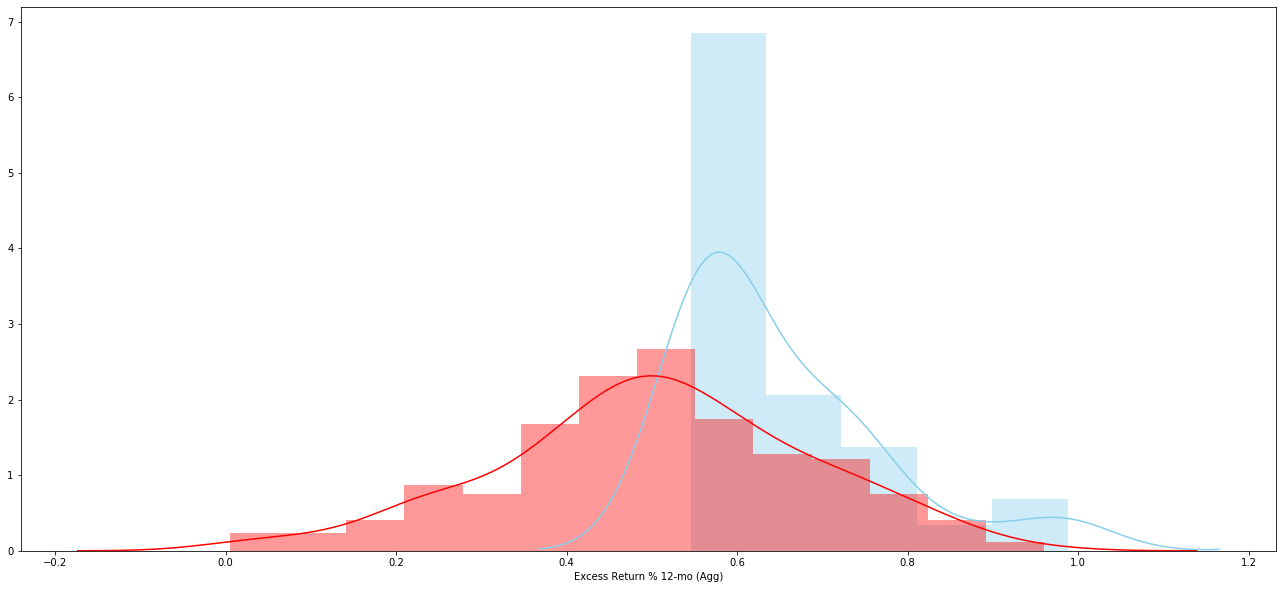

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 24-mo (Treasury)  257.0  0.481544  0.244801  0.015270   
 2                          combined  290.0  0.500645  0.239841  0.014084   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.451473  0.511615  
 2   0.472925  0.528365  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.1679
 1                              Degrees of freedom =   288.0000
 2                                               t =     3.8755
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.7167
 7                                       Hedge's g =     0.7148
 8       

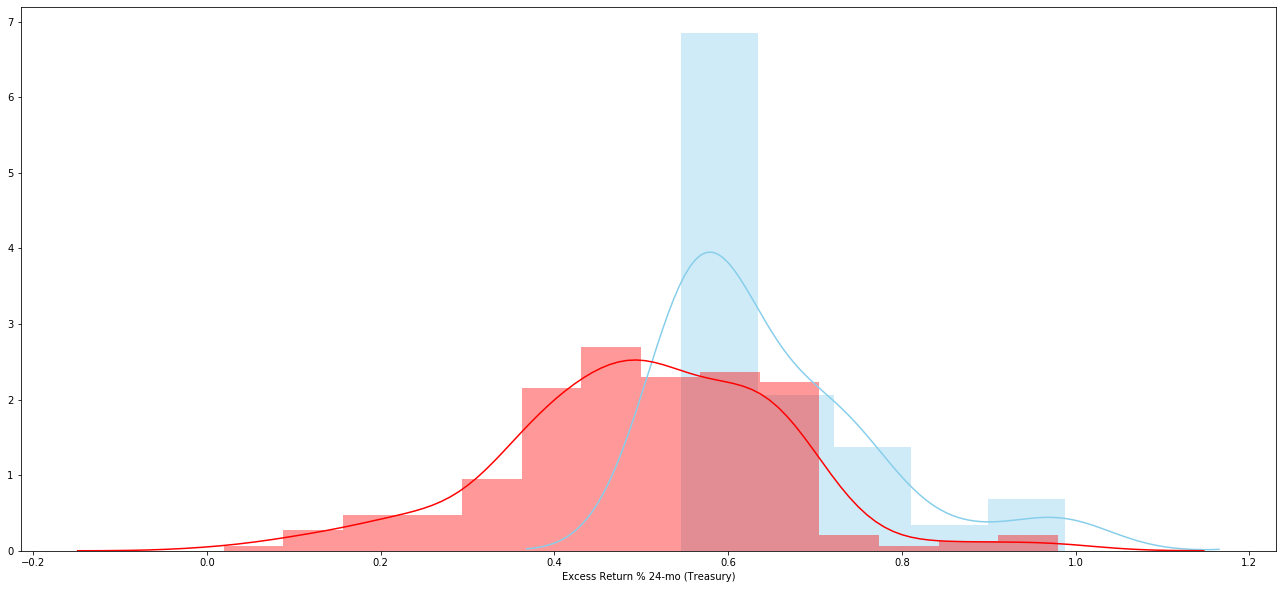

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 24-mo (Agg)  257.0  0.484984  0.213747  0.013333   
 2                     combined  290.0  0.503694  0.211646  0.012428   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.458727  0.511241  
 2   0.479232  0.528155  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.1644
 1                              Degrees of freedom =   288.0000
 2                                               t =     4.3281
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.8003
 7                                       Hedge's g =     0.7983
 8                           

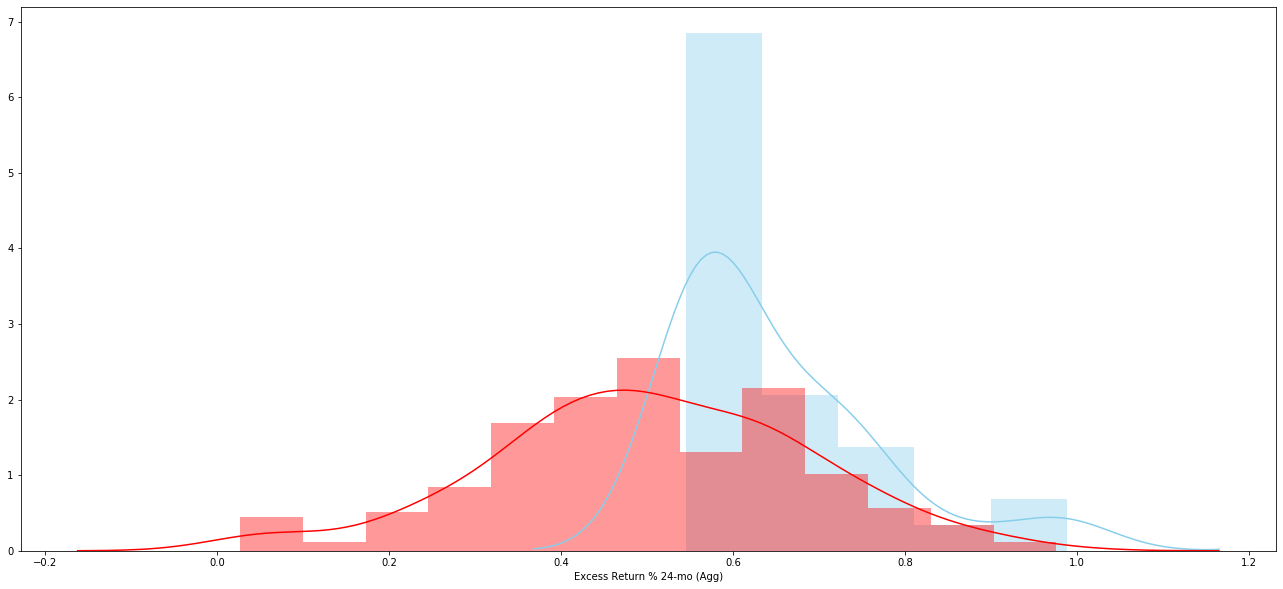

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 36-mo (Treasury)  245.0  0.495937  0.269899  0.017243   
 2                          combined  278.0  0.514154  0.261336  0.015674   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.461972  0.529901  
 2   0.483299  0.545009  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.1535
 1                              Degrees of freedom =   276.0000
 2                                               t =     3.2200
 3                           Two side test p value =     0.0014
 4                          Difference < 0 p value =     0.9993
 5                          Difference > 0 p value =     0.0007
 6                                       Cohen's d =     0.5971
 7                                       Hedge's g =     0.5955
 8       

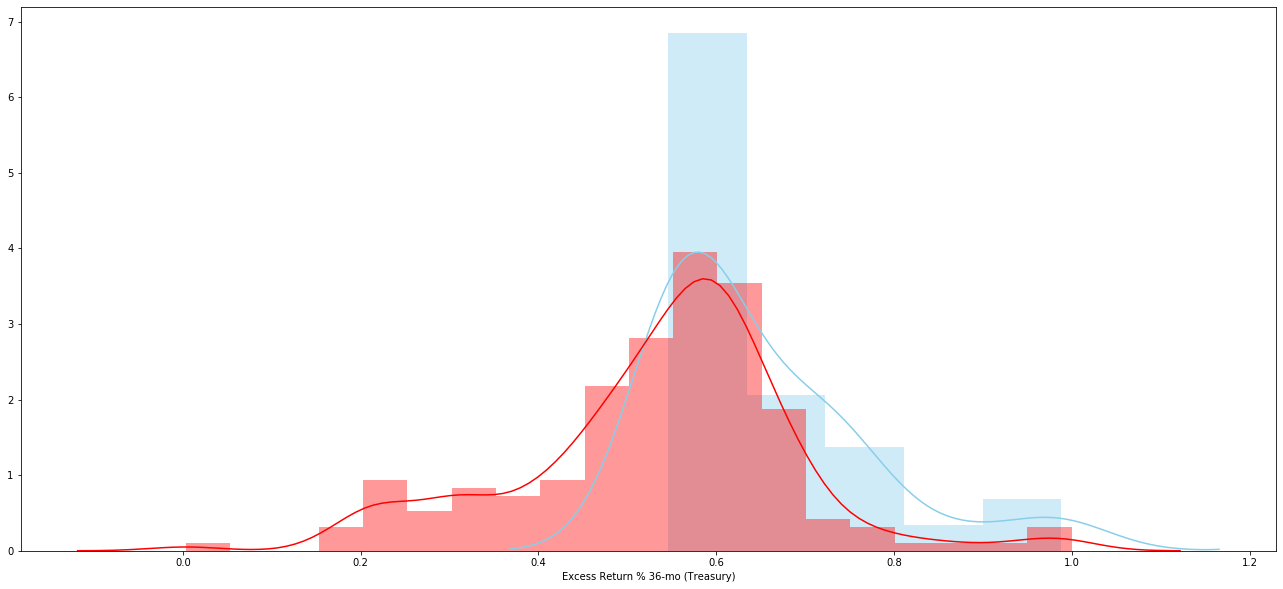

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 36-mo (Agg)  245.0  0.532766  0.216243  0.013815   
 2                     combined  278.0  0.546611  0.210416  0.012620   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.505554  0.559978  
 2   0.521768  0.571455  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.1166
 1                              Degrees of freedom =   276.0000
 2                                               t =     3.0333
 3                           Two side test p value =     0.0026
 4                          Difference < 0 p value =     0.9987
 5                          Difference > 0 p value =     0.0013
 6                                       Cohen's d =     0.5625
 7                                       Hedge's g =     0.5609
 8                           

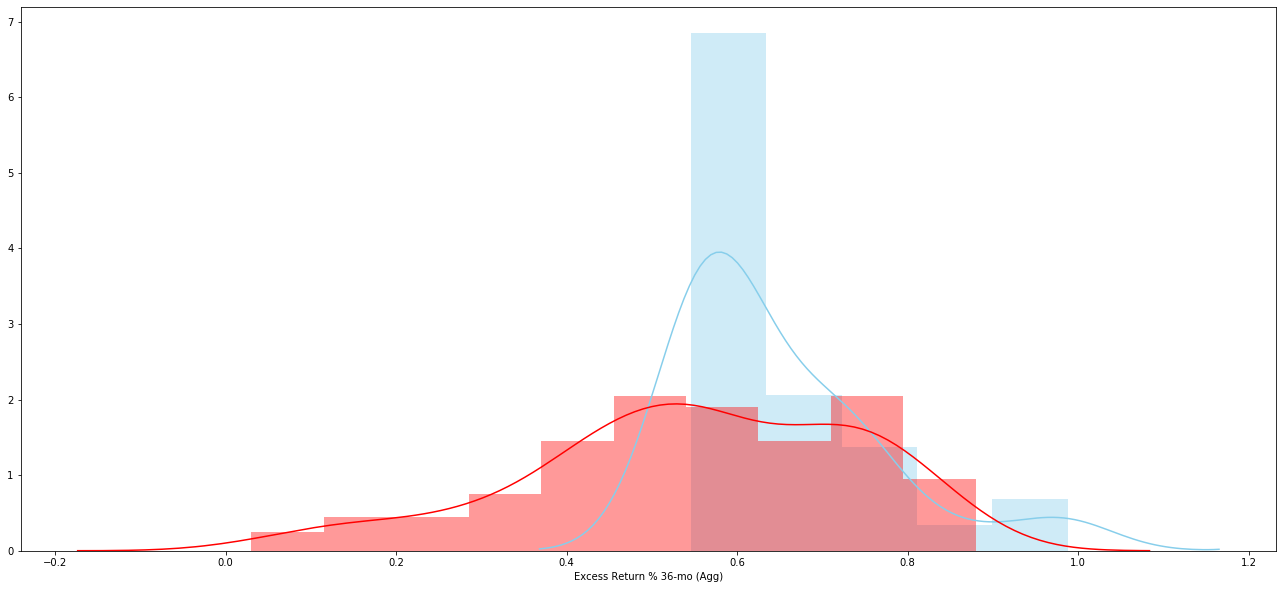

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")